In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()
# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [2]:
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [4]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


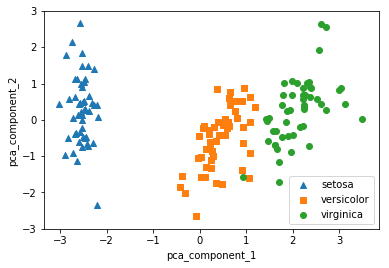

In [5]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']
#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [6]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk


In [39]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

In [8]:
df=pd.read_csv('../data/H1N1_Flu_Vaccines_removed2.csv')
df

,Unnamed: 0,h1n1_vaccine,seasonal_vaccine,age_group,sex,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_large_gatherings,behavioral_outside_home,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,income_poverty,employment_status
0,0,0,0,3,1,1,0,0,0,1,0,3,1,2,2,1,2,0,0,2
1,1,0,1,1,0,3,2,1,0,1,0,5,4,4,4,2,4,1,0,1
2,2,0,0,0,0,1,1,1,0,0,1,3,1,1,4,1,2,3,1,1
3,3,0,1,4,1,1,1,1,1,0,1,3,3,5,5,4,1,1,0,2
4,4,0,0,2,1,2,1,1,1,0,0,3,3,2,3,1,4,2,1,1
5,5,0,0,4,0,3,1,1,0,0,0,5,2,1,5,4,4,1,1,1
6,6,0,0,3,0,0,0,0,0,0,0,4,1,1,4,2,1,0,1,1
7,7,1,1,2,1,1,0,1,0,0,1,5,2,1,4,2,1,2,1,1
8,8,0,0,2,0,0,2,1,1,1,0,4,1,1,4,2,1,3,2,1
9,9,0,0,3,0,2,1,1,1,0,1,4,2,2,4,2,2,1,1,2


In [9]:
train_pre= df[['age_group','sex', 'education','income_poverty','employment_status', 
               'chronic_med_condition','h1n1_concern','h1n1_knowledge','behavioral_avoidance','behavioral_large_gatherings','behavioral_outside_home']]

In [10]:
from sklearn.preprocessing import StandardScaler
vacc_scaled = StandardScaler().fit_transform(df)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(vacc_scaled)
vacc_pca = pca.transform(vacc_scaled)
print(vacc_pca.shape)

(21543, 2)


In [19]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
vaccDF_pca = pd.DataFrame(vacc_pca,columns=pca_columns)
vaccDF_pca['target']=df['h1n1_vaccine']
vaccDF_pca.head(30)

,pca_component_1,pca_component_2,target
0,-2.175805,3.725466,0
1,1.931325,1.092432,0
2,-2.426670,0.033629,0
3,1.921235,1.650301,0
4,-0.676416,1.666233,0
5,0.575471,0.224761,0
6,-2.872181,1.036222,0
7,0.007407,-0.889427,1
8,-1.664304,-0.517797,0
9,0.029854,1.519863,0


In [21]:
target_name=np.array(['h1n1_vacc_no', 'h1n1_vacc_yes'])

In [15]:
target=df['h1n1_vaccine']

In [ ]:
#비접종(0)을 세모, 접종(1)을 동그라미로 표시
plt.figure(figsize=(15,15))
markers=['^', 'o']
#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = vaccDF_pca[vaccDF_pca['target']==i]['pca_component_1']
    y_axis_data = vaccDF_pca[vaccDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, 
                y_axis_data, 
                marker=marker,
                label=df['h1n1_vaccine'],
                alpha=0.25)
    
plt.legend(['h1n1_vacc_no', 'h1n1_vacc_yes'])
plt.title('h1n1_vacc_ scatter plot')
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [43]:
X_train, X_test, y_train, y_test=train_test_split(train_pre,
                 df[['h1n1_vaccine']], 
                 test_size = 0.2, 
                 random_state = 33 
                )

In [44]:
svm= SVC(kernel = "linear", C=10, gamma=0.1) 
svm.fit(X_train, y_train) 
print(svm.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7834764446507311


In [ ]:
X = np.array(vaccDF_pca[vaccDF_pca['pca_component_1', 'pca_component_2']
y = idf[['h1n1_vaccine']]
y = np.where(y=='h1n1_vacc_no', 0, np.where(y=='h1n1_vacc_yes', 1))

rfc = RandomForestClassifier(max_depth=2, n_estimators=200, random_state=1004)
rfc.fit(X, y)